In [ ]:
"""
responda isso aqui:

1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
2. Fazendo uma relação entre número de contatos e sucesso da campanha quais
são os pontos relevantes a serem observados?
3. Baseando-se nos resultados de adesão desta campanha qual o número médio e
o máximo de ligações que você indica para otimizar a adesão?
4. O resultado da campanha anterior tem relevância na campanha atual?
5. Qual o fator determinante para que o banco exija um seguro de crédito?
6. Quais são as características mais proeminentes de um cliente que possua
empréstimo imobiliário?

-duration é em s
-pdays é o dia de dias corridos(?) antes do ultimo contato,-1 = nunca
-previous é a qntd de contatos antes dessa campanha atual
-poutcome - é o resultado de campanhas passadas 
- não há nulos, data.isnull().sum()
"""

In [180]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [154]:
"""
1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

- da probabilidade do Ens Médio: desejado/total, onde desejado é empréstimo
- mas a primeira pergunta foi profissão, então vamos achar
  a profissão que mais pede emprestimo contando individualmente cada uma profissao.

- vamos: separar em comprar sim ou não
- separar em qual tipo de compra (4 possibilidades)
- um group by por profissao e emprestimo

- beleza, agora vamos ver qual é o tipo de emprestimo que é mais presente dentro 
  dessa profissão. Dado que escolhi o caso de sim/sim como uma 4 categoria,
  pois se ele é tão comprometido, talvez tenha algum espaço para olhar com um pouco 
  mais de cuidado
  
  """

In [ ]:
data = pd.read_csv('data/bank-full.csv',sep = ';')

In [190]:
## index  0 = casa, index  1 = pessoal
one_df = data 
possibilities = {'yesyes':'c1',
                 'nono':'c2',
                 'yesno':'c3',
                 'noyes':'c4'}

at_least =  {'yesyes':1,
              'nono':0,
              'yesno':1,
              'noyes':1}

one_df['any_loan'] = one_df.housing + one_df.loan
one_df['at_least_one_loan'] = one_df.any_loan.replace(at_least)
one_df['any_loan'] = one_df.any_loan.replace(possibilities)

In [218]:
#gb = one_df.groupby(['job', 'at_least_one_loan'])['age'].count()
#pd.DataFrame((gb/gb.groupby(level=0).sum()).nlargest(24)).reset_index()

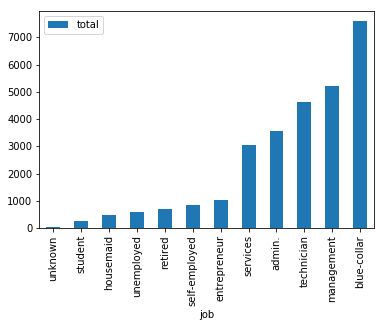

In [229]:
gb = pd.DataFrame(one_df.groupby(['job', 'at_least_one_loan'])['age'].count()).reset_index()
gb.columns = ['job', 'at_least_one_loan', 'total']
gb[gb['at_least_one_loan']==1].sort_values(by = 'total').plot(x= 'job',
                                                              y = 'total',
                                                              kind='bar')

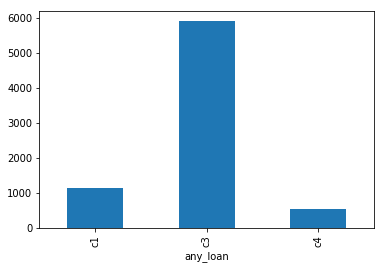

In [245]:
one_df[(one_df['job'] == 'blue-collar') & (one_df['any_loan'] != 'c2')]\
.groupby('any_loan').count()['age'].plot(kind = 'bar')

"""
c3 é o caso tem empréstimo de casa e não pessoal.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                Resposta: São os blue collar com empréstimo domiciliar
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
"""